## Descripción del proyecto

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

### Descripción de los datos

Características del DataFrame

- RowNumber: índice de cadena de datos
    
- CustomerId: identificador de cliente único
    
- Surname: apellido
    
- CreditScore: valor de crédito
    
- Geography: país de residencia
    
- Gender: sexo
    
- Age: edad
    
- Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
    
- Balance: saldo de la cuenta    
    
- NumOfProducts: número de productos bancarios utilizados por el cliente
    
- HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
    
- IsActiveMember: actividad del cliente (1 - sí; 0 - no)
    
- EstimatedSalary: salario estimado
    
Objetivo

- Exited: El cliente se ha ido (1 - sí; 0 - no)

## Inicialización

### Cargar librerías

In [1]:
#Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

In [2]:
#Cargar datos
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
#Información general sobre el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#Descripcion de los datos
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#Revisión de duplicados general
df.duplicated().sum()

0

In [6]:
#Vista previa de los datos
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


###### Hallazgos:

El dataframe no posee datos duplicados, el tipo de datos de las columnas es el apropiado, pero presenta datos ausentes en la columna 'Tenure'.

## Preprocesamiento de datos

### Examinar datos

Se examinan los datos de las columnas en busca de duplicados y/o datos mal escritos

In [7]:
#Revisión de duplicados en columna 'RowNumber'
df['RowNumber'].duplicated().sum()

0

In [8]:
#Revisión de duplicados en columna 'CustomerId'
df['CustomerId'].duplicated().sum()

0

In [9]:
#Revisión de duplicados en columna 'Geography'
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
#analizar datos de columna gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### Valores ausentes

In [11]:
#Vista previa datos ausentes
df[df['Tenure'].isna()==True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [12]:
print('Porcentaje de valores ausentes en la columna "Tenure":', round(909/10000*100,2),'%')


Porcentaje de valores ausentes en la columna "Tenure": 9.09 %


El porcentaje es considerable para eliminarlo por lo tanto se procede a asignarle un valor representativo a estas filas

In [13]:
#Cálculo de media y mediana
print('- Media de columna "tenure":',round(df['Tenure'].mean(),2))
print('- Mediana de columna "tenure":',round(df['Tenure'].median(),2))

- Media de columna "tenure": 5.0
- Mediana de columna "tenure": 5.0


In [14]:
#Se asigna el valor de 5 como el valor representativo
df['Tenure'] = df['Tenure'].fillna(5)

### Eliminar columnas innecesarias

Las columnas 'RowNumber', 'CustomerId' y 'Surname' no son relevantes para el análisis por lo que se proceden a  eliminar.

In [15]:
#Eliminación de columnas
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

### Convertir columnas categóricas en numéricas

Las columnas 'Geography' y 'Gender' son tipo categóricas. Se convierten en númericas con la técnica One-Hot Encoding (OHE) para poder entrenar al modelo de decisión.

In [16]:
#Transformar características categóricas en numéricas con OHE
df = pd.get_dummies(df,drop_first=True) 

In [17]:
#Vista previa nuevo df
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
#Renombrar columnas para que tengan el mismo formato que las otras
df = df.rename(columns={'Geography_Germany':'Germany',
                        'Geography_Spain':'Spain',
                        'Gender_Male': 'Male' })

In [19]:
#Reorganizar columnas para que la columna objetivo quede al final y mantener el orden original
df = df.reindex(columns=['CreditScore','Germany','Spain','Male','Age','Tenure','Balance','NumOfProducts',
                         'HasCrCard','IsActiveMember','EstimatedSalary','Exited'])

### Verificar correcciones

In [20]:
#Verificación de cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Germany          10000 non-null  uint8  
 2   Spain            10000 non-null  uint8  
 3   Male             10000 non-null  uint8  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  float64
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


In [21]:
#Vista previa df corregido
df.head()

,CreditScore,Germany,Spain,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,0,1,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,0,1,0,43,2.0,125510.82,1,1,1,79084.10,0


El dataframe ya no tiene valores ausentes, ni duplicados/erróneos. Las variables que posee son de tipo numérica.



## Modelos de datos semioriginales

Se entrenaran distintos modelos para analizar el comportamiento de los clientes y predecir si dejarán o no el banco.

Es de recalcar que el objetivo es una respuesta de categoría.

### Segmentación de datos

Se segmentan los datos fuente en 3 conjuntos:

- conjunto de entrenamiento (60%)
- conjunto de validación (20%)
- conjunto de prueba (20%)

In [22]:
#Separar conjunto de datos de prueba
df_t, df_test = train_test_split(df,test_size=0.2,random_state=12345)

#Separar conjunto de datos de entrenamiento y validacion. El test_size sube para compensar la reducción de filas
df_train, df_valid = train_test_split(df_t,test_size=0.25,random_state=12345)

In [23]:
#Variables de conjunto de entrenamiento
df_train_features = df_train.drop('Exited',axis=1)
df_train_target =  df_train['Exited']

In [24]:
#Variables de conjunto de validación
df_valid_features = df_valid.drop('Exited',axis=1)
df_valid_target = df_valid['Exited']

In [25]:
#Variables de conjunto de prueba
df_test_features = df_test.drop('Exited',axis=1)
df_test_target = df_test['Exited']

### Escalado de datos

In [26]:
#Exploración de columnas numéricas
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df_train_features[numeric].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,651.995833,38.818000,5.020500,76804.528083,1.523333,99915.369740
std,96.957092,10.478972,2.764963,62324.188916,0.583534,57486.946218
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,50731.855000
50%,653.000000,37.000000,5.000000,97055.145000,1.000000,99823.380000
75%,718.000000,44.000000,7.000000,127871.442500,2.000000,148733.105000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Las columnas númericas tienen distintas escalas, sus valores máximos tienen extremos que oscilan desde 4 hasta 250898.09 por lo que es recomendable estandarizarlas para darles la misma importancia y así mejorar el modelo.

In [27]:
scaler = StandardScaler()
scaler.fit(df_train_features[numeric]) 

#Escalar las características de todos los conjuntos de datos
df_train_features[numeric] = scaler.transform(df_train_features[numeric]) 
df_valid_features[numeric] = scaler.transform(df_valid_features[numeric]) 
df_test_features[numeric] = scaler.transform(df_test_features[numeric]) 

#Verificar cambios
df_train_features.head()

,CreditScore,Germany,Spain,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
492,-0.134048,0,0,0,-0.078068,-0.369113,0.076163,0.816929,0,1,0.331571
6655,-1.010798,0,0,1,0.494555,-0.007415,0.136391,-0.896909,1,1,-0.727858
4287,0.639554,1,0,1,1.353490,-1.454209,0.358435,-0.896909,1,1,-0.477006
42,-0.990168,0,0,0,2.116987,-1.092511,0.651725,-0.896909,1,1,-0.100232
8178,0.567351,0,0,0,0.685430,0.715982,0.813110,0.816929,1,1,0.801922


### Modelo árbol de decisión - clasificación

In [28]:
#Uso de GridSearchCV para buscar la mejor profundidad de árbol
model_dtc = DecisionTreeClassifier(random_state=12345)
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30,40],'criterion':['gini','entropy']}

grid_search = GridSearchCV(estimator=model_dtc, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(df_train_features, df_train_target)
model_dtc = grid_search.best_estimator_
grid_search.best_params_

Fitting 5 folds for each of 26 candidates, totalling 130 fits


{'criterion': 'gini', 'max_depth': 7}

In [29]:
#Comprobar valor F1 del modelo en todos los conjuntos
f1_tr_dtc =  round( f1_score(df_train_target, model_dtc.predict(df_train_features)) ,3)
f1_val_dtc = round( f1_score(df_valid_target,model_dtc.predict(df_valid_features))  ,3)
f1_ts_dtc  = round( f1_score(df_test_target, model_dtc.predict(df_test_features))   ,3)
 

print('Valor F1')
print('- Conjunto de entrenamiento:',f1_tr_dtc)
print('- Conjunto de validacion',f1_val_dtc)
print('- Conjunto de prueba:', f1_ts_dtc)

Valor F1
- Conjunto de entrenamiento: 0.626
- Conjunto de validacion 0.557
- Conjunto de prueba: 0.552


### Modelo bosque aleatorio - clasificación

In [30]:
#Uso de GridSearchCV para buscar las mejores características
model_rfc =RandomForestClassifier(random_state=12345)
param_grid = {'n_estimators': [2,4,6,8,10,12,14], 'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [3,4,5,6,7,8,9,10,11]}

grid_search = GridSearchCV(estimator=model_rfc, param_grid=param_grid, cv= 5)
grid_search.fit(df_train_features,df_train_target)
model_rfc = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 14}

In [31]:
#Comprobar valor F1 del modelo en todos los conjuntos
f1_tr_rfc =  round( f1_score(df_train_target, model_rfc.predict(df_train_features)) ,3)
f1_val_rfc =  round( f1_score(df_valid_target,model_rfc.predict(df_valid_features)) ,3)
f1_ts_rfc = round( f1_score(df_test_target, model_rfc.predict(df_test_features))  ,3)

print('Valor F1')
print('- Conjunto de entrenamiento:', f1_tr_rfc)
print('- Conjunto de validacion', f1_val_rfc)
print('- Conjunto de prueba:', f1_ts_rfc)

Valor F1
- Conjunto de entrenamiento: 0.711
- Conjunto de validacion 0.558
- Conjunto de prueba: 0.583


### Modelo regresión logística - clasificación

In [32]:
#Fijar modelo y entrenarlo
model_lr = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr.fit(df_train_features,df_train_target)

LogisticRegression(random_state=12345, solver='liblinear')

In [33]:
#Comprobar valor F1 del modelo en todos los conjuntos
f1_tr_lr =  round( f1_score(df_train_target, model_lr.predict(df_train_features)) ,3)
f1_val_lr = round( f1_score(df_valid_target,model_lr.predict(df_valid_features))  ,3)
f1_ts_lr =  round( f1_score(df_test_target, model_lr.predict(df_test_features))   ,3)

print('Valor F1')
print('- Conjunto de entrenamiento:',f1_tr_lr)
print('- Conjunto de validacion:',f1_val_lr)
print('- Conjunto de prueba:', f1_ts_lr)

Valor F1
- Conjunto de entrenamiento: 0.328
- Conjunto de validacion: 0.301
- Conjunto de prueba: 0.301


###### Hallazgos

- El **modelo regresión logística** fue el del valor F1 más pequeño comparado entre los 3, seguido del **Modelo árbol de decisión**, dejando al **Modelo bosque aleatorio** con el valor F1 más alto; sin embargo, este último es el que muestra más sobreajuste.

- Se busca un valor F1 mayor en los conjuntos de prueba y validación por lo que se continuará trabajando con los datos.

In [34]:
# Tabla comparativa valores F1 - datos semioriginales
table1 = pd.DataFrame({'Model':['Decision Tree Classifier', 'Random Forest Classifier', 'Logistic Regression'],
        'Training set F1 Score':   [f1_tr_dtc    , f1_tr_rfc   , f1_tr_lr ],
        'Validation set F1 Score': [f1_val_dtc   , f1_val_rfc  , f1_val_lr],
        'Test set F1 Score':       [f1_ts_dtc    , f1_ts_rfc   , f1_ts_lr] })

table1

,Model,Training set F1 Score,Validation set F1 Score,Test set F1 Score
0,Decision Tree Classifier,0.626,0.557,0.552
1,Random Forest Classifier,0.711,0.558,0.583
2,Logistic Regression,0.328,0.301,0.301


## Modelos de datos con sobremuestreo

A continuación, se examinan los datos, ya escalados, para equilibrarlos y mejorar el modelo.

In [35]:
#Comparar cantidad de datos positivos y negativos de columna objetivo
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [36]:
print('Porcentaje de clientes que se quedan: ',7963/10000*100,'%')
print('Porcentaje de clientes que se van: ',round(2037/10000*100,2),'%')

Porcentaje de clientes que se quedan:  79.63 %
Porcentaje de clientes que se van:  20.37 %


### Balancear datos

En el conjunto de datos de entrenamiento, se hace que el resultado 1 (clientes que se van) de la columna objetivo 'Exited' tenga una frecuencia mayor.

In [37]:
#Separar respuestas de conjunto de datos de entrenamiento
features_zeros = df_train_features[df_train_target == 0] 
features_ones = df_train_features[df_train_target == 1] 
target_zeros = df_train_target[df_train_target == 0] 
target_ones = df_train_target[df_train_target == 1]

#Aumentar observaciones positivas
features_upsampled = pd.concat([features_zeros] + [features_ones] * 2) 
target_upsampled = pd.concat([target_zeros] + [target_ones] * 2)

#Crear nuevos datos de entrenamiento con los datos mezclados
features_upsampled, target_upsampled = shuffle(features_upsampled,target_upsampled, random_state=12345) 

In [38]:
#Vista previa de características balanceadas y escaladas
features_upsampled.head()

,CreditScore,Germany,Spain,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2427,1.505989,1,0,0,0.971741,-0.007415,0.894866,-0.896909,1,1,-1.186960
2182,0.134134,0,1,1,-0.078068,1.439380,-1.232442,-0.896909,0,1,-0.217505
193,-0.526007,0,0,1,-0.650691,1.077681,0.260087,-0.896909,1,0,-0.225426
7398,-2.052582,1,0,0,0.112807,-0.007415,0.557133,-0.896909,1,1,0.355910
6104,0.866478,1,0,1,1.067178,1.439380,0.633908,-0.896909,1,0,1.486462


### Modelo árbol de decisión - clasificación

In [39]:
#Uso de GridSearchCV para buscar la mejor profundidad de árbol
model_dtc2 = DecisionTreeClassifier(random_state=12345)
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30,40],'criterion':['gini','entropy']}

grid_search = GridSearchCV(estimator=model_dtc2, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(features_upsampled, target_upsampled)
model_dtc2 = grid_search.best_estimator_
grid_search.best_params_

Fitting 5 folds for each of 26 candidates, totalling 130 fits


{'criterion': 'entropy', 'max_depth': 30}

In [40]:
#Comprobar valor F1 del modelo en todos los conjuntos
f1_tr_dtc =  round(f1_score(target_upsampled, model_dtc2.predict(features_upsampled)) ,3)
f1_val_dtc = round(f1_score(df_valid_target,model_dtc2.predict(df_valid_features))    ,3) 
f1_ts_dtc =  round(f1_score(df_test_target, model_dtc2.predict(df_test_features))     ,3)

print('Valor F1')
print('- Conjunto de entrenamiento:', f1_tr_dtc)
print('- Conjunto de validacion:', f1_val_dtc)
print('- Conjunto de prueba:', f1_ts_dtc)

Valor F1
- Conjunto de entrenamiento: 1.0
- Conjunto de validacion: 0.485
- Conjunto de prueba: 0.52


### Modelo bosque aleatorio - clasificación

In [41]:
#Uso de GridSearchCV para buscar las mejores características
model_rfc2 =RandomForestClassifier(random_state=12345)
param_grid = {'n_estimators': [1,2,3,4,5,6,7,8,9,10], 'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [3,4,5,6,7,8,9,10]}

grid_search = GridSearchCV(estimator=model_rfc2, param_grid=param_grid, cv= 5)
grid_search.fit(features_upsampled, target_upsampled)
model_rfc2 = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10}

In [42]:
#Comprobar valor F1 del modelo en todos los conjuntos
f1_tr_rfc =  round(f1_score(target_upsampled, model_rfc2.predict(features_upsampled))  ,3)
f1_val_rfc =  round(f1_score(df_valid_target,model_rfc2.predict(df_valid_features))  ,3)
f1_ts_rfc = round(f1_score(df_test_target, model_rfc2.predict(df_test_features))  ,3)

print('Valor F1')
print('- Conjunto de entrenamiento:', f1_tr_rfc)
print('- Conjunto de validacion:', f1_val_rfc)
print('- Conjunto de prueba', f1_ts_rfc)

Valor F1
- Conjunto de entrenamiento: 0.81
- Conjunto de validacion: 0.585
- Conjunto de prueba 0.617


### Modelo regresión logística - clasificación

In [43]:
#Fijar y entrenar modelo
model_lr2 = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr2.fit(features_upsampled,target_upsampled)

LogisticRegression(random_state=12345, solver='liblinear')

In [44]:
#Comprobar valor F1 del modelo en todos los conjuntos
f1_tr_lr =  round(f1_score(target_upsampled, model_lr2.predict(features_upsampled)) ,3)
f1_val_lr = round(f1_score(df_valid_target,model_lr2.predict(df_valid_features))    ,3)
f1_ts_lr =  round(f1_score(df_test_target, model_lr2.predict(df_test_features))     ,3)

print('Valor F1')
print('- Conjunto de entrenamiento:', f1_tr_lr)
print('- Conjunto de validacion:', f1_val_lr)
print('- Conjunto de prueba:', f1_ts_lr)

Valor F1
- Conjunto de entrenamiento: 0.538
- Conjunto de validacion: 0.484
- Conjunto de prueba: 0.455


In [45]:
# Tabla comparativa valores F1 - datos con sobremuestreo
table2 = pd.DataFrame({'Model':['Decision Tree Classifier', 'Random Forest Classifier', 'Logistic Regression'],
        'Training set F1 Score':   [f1_tr_dtc    , f1_tr_rfc   , f1_tr_lr ],
        'Validation set F1 Score': [f1_val_dtc   , f1_val_rfc  , f1_val_lr],
        'Test set F1 Score':       [f1_ts_dtc    , f1_ts_rfc   , f1_ts_lr] })

table2

,Model,Training set F1 Score,Validation set F1 Score,Test set F1 Score
0,Decision Tree Classifier,1.000,0.485,0.520
1,Random Forest Classifier,0.810,0.585,0.617
2,Logistic Regression,0.538,0.484,0.455


###### Hallazgos

- El modelo bosque aleatorio tuvo el mejor valor de F1.

- El modelo árbol de decisión posee un valor F1 de 1 en el conjunto de datos de entrenamiento, lo que indica un sobreajuste afectando al modelo.


## Modelos de datos con ajuste de peso

Se balancea el peso de clase de los datos ya escalados.

### Modelo árbol de decisión - clasificación

In [46]:
#Uso de GridSearchCV para buscar la mejor profundidad de árbol
model_dtc3 = DecisionTreeClassifier(random_state=12345,class_weight='balanced')
param_grid = {'max_depth': [4,5,6,7,8,9,10,15,20,25,30,35,40],'criterion':['gini','entropy']}

grid_search = GridSearchCV(estimator=model_dtc3, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(df_train_features, df_train_target)
model_dtc3 = grid_search.best_estimator_
grid_search.best_params_

Fitting 5 folds for each of 26 candidates, totalling 130 fits


{'criterion': 'entropy', 'max_depth': 25}

In [47]:
#Comprobar valor F1 del modelo en todos los conjuntos
f1_tr_dtc =  round(f1_score(df_train_target, model_dtc3.predict(df_train_features)) ,3)
f1_val_dtc = round(f1_score(df_valid_target,model_dtc3.predict(df_valid_features))  ,3) 
f1_ts_dtc =  round(f1_score(df_test_target, model_dtc3.predict(df_test_features))   ,3)

print('Valor F1')
print('- Conjunto de entrenamiento:', f1_tr_dtc)
print('- Conjunto de validacion:', f1_val_dtc)
print('- Conjunto de prueba:', f1_ts_dtc)

Valor F1
- Conjunto de entrenamiento: 0.996
- Conjunto de validacion: 0.492
- Conjunto de prueba: 0.514


### Modelo bosque aleatorio - clasificación

In [48]:
#Uso de GridSearchCV para buscar las mejores características
model_rfc3 =RandomForestClassifier(random_state=12345,class_weight='balanced')
param_grid = {'n_estimators': [2,4,6,8,10,12,14], 'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [3,4,5,6,7,8,9,10,11]}

grid_search = GridSearchCV(estimator=model_rfc3, param_grid=param_grid, cv= 5)
grid_search.fit(df_train_features,df_train_target)
model_rfc3 = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 11, 'max_features': 'auto', 'n_estimators': 14}

In [49]:
#Comprobar valor F1 del modelo en todos los conjuntos
f1_tr_rfc =  round(f1_score(df_train_target, model_rfc3.predict(df_train_features)) ,3)
f1_val_rfc = round(f1_score(df_valid_target,model_rfc3.predict(df_valid_features))  ,3)
f1_ts_rfc =  round(f1_score(df_test_target, model_rfc3.predict(df_test_features))   ,3)

print('Valor F1')
print('- Conjunto de entrenamiento:', f1_tr_rfc)
print('- Conjunto de validacion:', f1_val_rfc)
print('- Conjunto de prueba:', f1_ts_rfc)

Valor F1
- Conjunto de entrenamiento: 0.837
- Conjunto de validacion: 0.592
- Conjunto de prueba: 0.624


### Modelo regresión logística - clasificación

In [50]:
#Fijar y entrenar modelo
model_lr3 = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced') 
model_lr3.fit(features_upsampled,target_upsampled)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [51]:
#Comprobar valor F1 del modelo en todos los conjuntos
f1_tr_lr =  round(f1_score(target_upsampled, model_lr3.predict(features_upsampled)) ,3)
f1_val_lr = round(f1_score(df_valid_target,model_lr3.predict(df_valid_features))    ,3) 
f1_ts_lr =  round(f1_score(df_test_target, model_lr3.predict(df_test_features))     ,3)

print('Valor F1')
print('- Conjunto de entrenamiento:', f1_tr_lr)
print('- Conjunto de validacion:', f1_val_lr)
print('- Conjunto de prueba:', f1_ts_lr)

Valor F1
- Conjunto de entrenamiento: 0.618
- Conjunto de validacion: 0.474
- Conjunto de prueba: 0.503


Hallazgos

- El **Modelo regresión logística** fue el de los valores F1 más pequeños y el **Modelo árbol de decisión** tiene un valor F1 cercano a 1 en el conjunto de datos de entrenamiento lo cual muestra sobreajuste cosa que afecta al modelo.

- El **Modelo bosque aleatorio** tiene valores F1 aceptables en los 3 conjuntos de datos. Se fija este último modelo como el más óptimo ya que sus valores F1 son de al menos 0.59 y el modelo de entrenamiento no muestra un sobreajuste significativo como otros modelos.

In [52]:
#Tabla comparativa valores F1 - datos con ajuste de peso
table3 = pd.DataFrame({'Model':['Decision Tree Classifier', 'Random Forest Classifier', 'Logistic Regression'],
        'Training set F1 Score':   [f1_tr_dtc    , f1_tr_rfc   , f1_tr_lr ],
        'Validation set F1 Score': [f1_val_dtc   , f1_val_rfc  , f1_val_lr],
        'Test set F1 Score':       [f1_ts_dtc    , f1_ts_rfc   , f1_ts_lr] })

table3

,Model,Training set F1 Score,Validation set F1 Score,Test set F1 Score
0,Decision Tree Classifier,0.996,0.492,0.514
1,Random Forest Classifier,0.837,0.592,0.624
2,Logistic Regression,0.618,0.474,0.503


## Área bajo la curva ROC

Se calcula el área bajo la Curva característica operativa del receptor(AUC-ROC) del modelo elegido.

El valor AUC-ROC para un modelo aleatorio es 0.5. Cuanto más alta sea la curva, mayor será el valor TVP (tasa de verdaderos positivos) y mejor será la calidad del modelo.

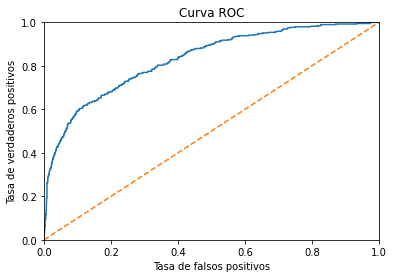

Métrica AUC-ROC: 0.83


In [53]:
probabilities_valid = model_rfc3.predict_proba(df_valid_features) 
probabilities_one_valid = probabilities_valid[:, 1] 
fpr, tpr, thresholds = roc_curve(df_valid_target, probabilities_one_valid) 

plt.figure() 
plt.plot(fpr, tpr)  

# Curva ROC para modelo aleatorio 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('Tasa de falsos positivos') 
plt.ylabel('Tasa de verdaderos positivos') 
plt.title('Curva ROC') 
plt.show() 

roc = round( roc_auc_score(df_valid_target, probabilities_one_valid), 3)
print('Métrica AUC-ROC:', roc)

- La métrica AUC-ROC es cercana a 1 por lo que se tiene una buena calidad del modelo.

- La métrica AUC-ROC tomó casi el mismo valor F1 del modelo aplicado al conjunto de entrenamiento.

In [54]:
print('- Valor F1 del conjunto de entrenamiento: ',f1_tr_rfc)

- Valor F1 del conjunto de entrenamiento:  0.837


## Conclusión / Resultados

### Comparación de valores F1

In [55]:
#Tabla comparativa valores F1 - datos semioriginales
table1

,Model,Training set F1 Score,Validation set F1 Score,Test set F1 Score
0,Decision Tree Classifier,0.626,0.557,0.552
1,Random Forest Classifier,0.711,0.558,0.583
2,Logistic Regression,0.328,0.301,0.301


Tras comparar los valores F1 de los modelos árbol de decisión, bosque aleatorio y regresión logística, se encontró que el mejor fue el Modelo bosque aleatorio cuyos valores F1 son los más altos en los 3 conjuntos. Sin embargo, muestra sobreajuste en el conjunto de entrenamiento.

Después, se optó por balancear los datos, haciendo más frecuentes las respuestas positivas, para mejorar los modelos ya mencionados.

In [56]:
#Tabla comparativa valores F1 - datos con sobremuestreo
table2

,Model,Training set F1 Score,Validation set F1 Score,Test set F1 Score
0,Decision Tree Classifier,1.000,0.485,0.520
1,Random Forest Classifier,0.810,0.585,0.617
2,Logistic Regression,0.538,0.484,0.455


Este cambio no mejoró todos los modelos pero sí mejoro el Modelo bosque aleatorio, pues todos sus valores F1 incrementaron.

Finalmente, se hizo un ajuste para balancear los pesos de las clases.

In [57]:
#Tabla comparativa valores F1 - datos con ajuste de peso
table3

,Model,Training set F1 Score,Validation set F1 Score,Test set F1 Score
0,Decision Tree Classifier,0.996,0.492,0.514
1,Random Forest Classifier,0.837,0.592,0.624
2,Logistic Regression,0.618,0.474,0.503


Este último ajuste mejoró más el Modelo bosque aleatorio, dejandolo con los valores más altos en los conjuntos de validación y prueba.

### Modelo elegido

Tomando en cuenta los valores F1 mencionados, se recomienda usar el Modelo bosque aleatorio el cual cuenta con datos escalados y pesos de clase balanceados.

Los valores F1 del modelo son altos y no hay un sobreajuste significativo en el conjunto de entrenamiento.

In [58]:
print('- Métrica AUC-ROC: ', roc)
print('- Valor F1 del conjunto de entrenamiento: ',f1_tr_rfc)

- Métrica AUC-ROC:  0.83
- Valor F1 del conjunto de entrenamiento:  0.837


## Conclusión general

El proyecto consiste en crear un modelo con el máximo valor F1 posible. Al menos superior de 0.59. Y el verificar F1 para el conjunto de prueba.

### Abrir el dataframe

- Con la carga de las librerías apropiadas para el proyecto y una revisión del dataframe, se observó que en la columna 'Tenure' hay valores ausentes. 

### Preprocesamiento de datos

- El porcentaje de valores ausentes en la columna 'Tenure' es de 9% y se procedio a asignarles un valor representativo (5).

- Se eliminó 3 columnas innecesarias.

- Como las columnas 'Geography' y 'Gender' son de tipo categóricas. Se procedio a convertilas en númericas con la técnica One-Hot Encoding (OHE) para poder entrenar al modelo de decisión.

### Modelos de datos semioriginales

- Se entrenaron distintos modelos para analizar el comportamiento de los clientes y predecir si dejarán o no el banco, previo a esto se escalaron los valores ya que existían valores muy extremos y podía afectar al modelo.

- El modelo regresión logística fue el del valor F1 más pequeño comparado entre los 3, seguido del Modelo árbol de decisión, dejando al Modelo bosque aleatorio con el valor F1 más alto; sin embargo, este último es el que muestra más sobreajuste.

### Modelos de datos con sobremuestreo

- El modelo bosque aleatorio tuvo el mejor valor de F1.

- El modelo árbol de decisión posee un valor F1 de 1 en el conjunto de datos de entrenamiento, lo que indica un sobreajuste afectando al modelo.

### Modelos de datos con ajuste de peso

- El **Modelo regresión logística** fue el de los valores F1 más pequeños y el **Modelo árbol de decisión** tiene un valor F1 cercano a 1 en el conjunto de datos de entrenamiento lo cual muestra sobreajuste cosa que afecta al modelo.

- El **Modelo bosque aleatorio** tiene valores F1 aceptables en los 3 conjuntos de datos. Se fija este último modelo como el más óptimo ya que sus valores F1 son de al menos 0.59 y el modelo de entrenamiento no muestra un sobreajuste significativo como otros modelos.

### Área bajo la curva ROC

- La métrica AUC-ROC es cercana a 1 por lo que se tiene una buena calidad del modelo.

- La métrica AUC-ROC tomó casi el mismo valor F1 del modelo aplicado al conjunto de entrenamiento.

-  Métrica AUC-ROC:  0.83


### Modelo recomendado

- Se recomienda usar el **Modelo bosque aleatorio** el cual cuenta con datos escalados y pesos de clase balanceados.

- Los valores F1 del modelo son altos y no hay un sobreajuste significativo en el conjunto de entrenamiento. 

- Valor F1 del conjunto de entrenamiento:  0.837
